# Assignment 3 — ANOVA & Chi-Squared using Country Dataset

Dataset used: country_profile_variables.csv

We will perform:

### One-way ANOVA

Comparing GDP per capita across regions.

### Chi-Squared Test of Independence

Testing relationship between Region and Income Category / Binary Variable
(Since dataset may not have income category, we will create one based on GDP per capita.)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("E:/Engineering/Machine Learning/ADS-VAC/notebooks/datasets/country_profile_variables.csv")

df.head()


,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


### Basic Cleaning (Handle Missing / Placeholder −99 values)

In [3]:
# Replace -99 placeholder with NaN
df = df.replace(-99, np.nan)

# View missing values
df.isna().sum().head(20)


country                                               0
Region                                                0
Surface area (km2)                                    0
Population in thousands (2017)                        0
Population density (per km2, 2017)                    0
Sex ratio (m per 100 f, 2017)                         2
GDP: Gross domestic product (million current US$)    21
GDP growth rate (annual %, const. 2005 prices)        0
GDP per capita (current US$)                         21
Economy: Agriculture (% of GVA)                       0
Economy: Industry (% of GVA)                         21
Economy: Services and other activity (% of GVA)      21
Employment: Agriculture (% of employed)               0
Employment: Industry (% of employed)                  0
Employment: Services (% of employed)                  0
Unemployment (% of labour force)                      0
Labour force participation (female/male pop. %)       0
Agricultural production index (2004-2006=100)   

### Selecting Columns for ANOVA

Region → categorical grouping

GDP_per_capita → numeric variable

In [4]:
# Identify the correct column names
df.columns.tolist()


['country',
 'Region',
 'Surface area (km2)',
 'Population in thousands (2017)',
 'Population density (per km2, 2017)',
 'Sex ratio (m per 100 f, 2017)',
 'GDP: Gross domestic product (million current US$)',
 'GDP growth rate (annual %, const. 2005 prices)',
 'GDP per capita (current US$)',
 'Economy: Agriculture (% of GVA)',
 'Economy: Industry (% of GVA)',
 'Economy: Services and other activity (% of GVA)',
 'Employment: Agriculture (% of employed)',
 'Employment: Industry (% of employed)',
 'Employment: Services (% of employed)',
 'Unemployment (% of labour force)',
 'Labour force participation (female/male pop. %)',
 'Agricultural production index (2004-2006=100)',
 'Food production index (2004-2006=100)',
 'International trade: Exports (million US$)',
 'International trade: Imports (million US$)',
 'International trade: Balance (million US$)',
 'Balance of payments, current account (million US$)',
 'Population growth rate (average annual %)',
 'Urban population (% of total populat

### Filter Valid Rows

In [5]:
anova_df = df[['Region', 'GDP per capita (current US$)']].dropna()

anova_df.head()


,Region,GDP per capita (current US$)
0,SouthernAsia,623.2
1,SouthernEurope,3984.2
2,NorthernAfrica,4154.1
4,SouthernEurope,39896.4
5,MiddleAfrica,4714.1


### Visualize Group Differences

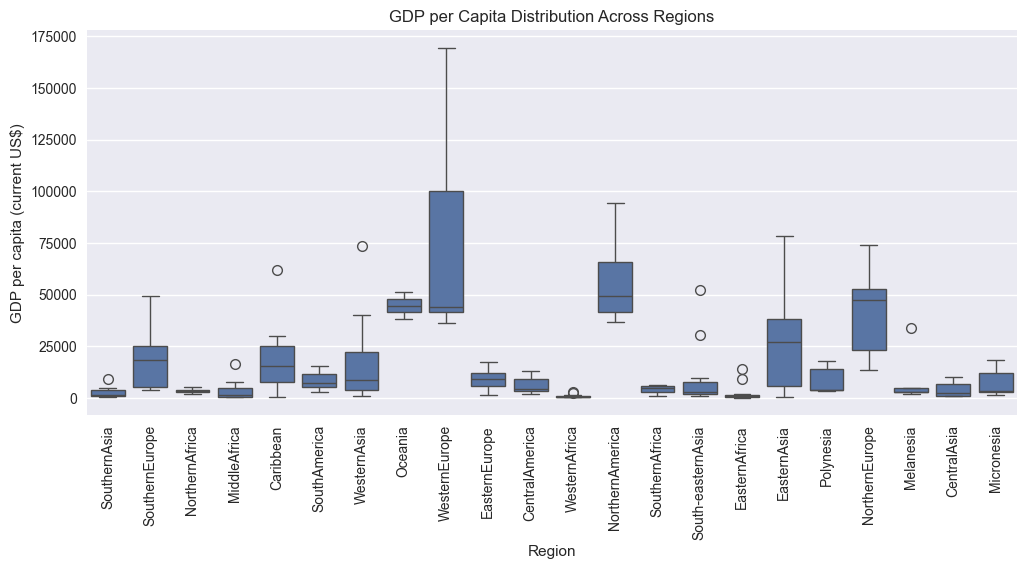

In [6]:
plt.figure(figsize=(12,5))
sns.boxplot(data=anova_df, x='Region', y='GDP per capita (current US$)')
plt.xticks(rotation=90)
plt.title("GDP per Capita Distribution Across Regions")
plt.show()


### Perform One-Way ANOVA

ANOVA checks whether mean GDP per capita differs significantly across regions.

In [7]:
groups = [group["GDP per capita (current US$)"].values
          for name, group in anova_df.groupby("Region")]

f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_value)


ANOVA F-statistic: 11.956619330704644
ANOVA p-value: 1.2863582912721203e-24


#### ANOVA Interpretation

Null Hypothesis (H₀): All regions have equal mean GDP per capita

Alternative (H₁): At least one region differs

If p_value < 0.05 → reject H₀ → significant difference between regions.

### CHI-SQUARED TEST

We need two categorical variables.

Dataset may not include income category, so we create one:

High income if GDP per capita > median

Low income otherwise

This helps check if region and income level are independent.

In [8]:
# Use median GDP as threshold
threshold = anova_df["GDP per capita (current US$)"].median()

df["Income_Category"] = np.where(df["GDP per capita (current US$)"] >= threshold,
                                 "High_Income", "Low_Income")

df[['Region', 'Income_Category']].head()


,Region,Income_Category
0,SouthernAsia,Low_Income
1,SouthernEurope,Low_Income
2,NorthernAfrica,Low_Income
3,Polynesia,Low_Income
4,SouthernEurope,High_Income


### Build Contingency Table

In [9]:
contingency = pd.crosstab(df['Region'], df['Income_Category'])
contingency


Income_Category,High_Income,Low_Income
Region,,
Caribbean,19,6
CentralAmerica,3,5
CentralAsia,2,3
EasternAfrica,2,17
EasternAsia,5,2
EasternEurope,7,3
Melanesia,1,4
Micronesia,2,5
MiddleAfrica,2,7


### Chi-Squared Test

In [10]:
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi-Squared Value:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


Chi-Squared Value: 81.03627762465379
p-value: 5.4151459391137285e-09
Degrees of Freedom: 21
Expected Frequencies:
 [[11.35371179 13.64628821]
 [ 3.63318777  4.36681223]
 [ 2.27074236  2.72925764]
 [ 8.62882096 10.37117904]
 [ 3.1790393   3.8209607 ]
 [ 4.54148472  5.45851528]
 [ 2.27074236  2.72925764]
 [ 3.1790393   3.8209607 ]
 [ 4.08733624  4.91266376]
 [ 3.1790393   3.8209607 ]
 [ 2.27074236  2.72925764]
 [ 5.90393013  7.09606987]
 [ 0.90829694  1.09170306]
 [ 4.08733624  4.91266376]
 [ 4.99563319  6.00436681]
 [ 6.3580786   7.6419214 ]
 [ 2.27074236  2.72925764]
 [ 4.08733624  4.91266376]
 [ 7.26637555  8.73362445]
 [ 7.26637555  8.73362445]
 [ 8.17467249  9.82532751]
 [ 4.08733624  4.91266376]]


#### Chi-Square Interpretation

Null Hypothesis (H₀): Region and Income Category are independent

Alternative (H₁): They are related

If:

p-value < 0.05 → Reject H₀ → Region affects income level
p-value ≥ 0.05 → Fail to reject H₀ → No relationship